<a href="https://colab.research.google.com/github/GladwelWanjau/Core-Projects./blob/master/Moringa_Data_Science_Core_Week3_Independent_Project_Python_Notebook_Gladwel_Wanjau.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 # Importing Numpy
import numpy as np

# Importing Pandas
import pandas as pd

# Importing Matplotlib
import matplotlib.pyplot as plt

# Importing Seaborn
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Selecting a random sample from the following medical appointments dataset
# ---
# Dataset url = https://tradingeconomics.com/kenya/stock-market
# ---
# 

# Loading the dataset
data = pd.read_csv("Nse 20 Share Index Historical Data.csv")
data

# Determining the size
print(data.shape)
#The data has 1,498 Rows and two columns




(1498, 2)


In [ ]:
# Previewing the dataset
print(data.head())



  Transaction Date  NSE 20 Share Index
0         2-Jan-14             4910.74
1         3-Jan-14             4901.12
2         6-Jan-14             4940.51
3         7-Jan-14             4993.12
4         8-Jan-14             5010.93


In [ ]:
#Converting the Transaction date into date format
data['Transaction Date']=pd.to_datetime(data['Transaction Date'])
#When we implement this the below code shows that our column is in datetime datatype


In [ ]:
#Converting the NSE 20 Share Index into float format
data['NSE 20 Share Index'].astype(float)

0       4910.74
1       4901.12
2       4940.51
3       4993.12
4       5010.93
         ...   
1493    2596.12
1494    2612.13
1495    2646.14
1496    2633.01
1497    2654.39
Name: NSE 20 Share Index, Length: 1498, dtype: float64

In [ ]:
#Checking the data types
data.dtypes

Transaction Date      datetime64[ns]
NSE 20 Share Index           float64
dtype: object

In [ ]:
# Selecting the sample 
data_sample = data.sample(n = 250, replace="False")
print(data_sample)

     Transaction Date  NSE 20 Share Index
99         2014-05-26             4899.92
1380       2019-07-11             2686.94
477        2015-11-25             4044.72
629        2016-07-05             3668.45
900        2017-08-04             3775.89
...               ...                 ...
144        2014-07-30             4891.03
1269       2019-01-31             2958.36
584        2016-04-29             4009.26
190        2014-10-02             5249.65
210        2014-10-31             5194.89

[250 rows x 2 columns]


In [ ]:
#Setting the Date Column as the Index
data = data.set_index('Transaction Date')
data.head(5)

,NSE 20 Share Index
Transaction Date,
2014-01-02,4910.74
2014-01-03,4901.12
2014-01-06,4940.51
2014-01-07,4993.12
2014-01-08,5010.93


In [ ]:
#Utilizing the loc accessor to access the Index of a particular day
data.loc['2014-01-08']

NSE 20 Share Index    5010.93
Name: 2014-01-08 00:00:00, dtype: float64

In [ ]:
#Utilizing the partial-string indexing to select data in a particular year or month
data.loc['2018']
#This code selects all the observation in the dataset made in the year 2018

,NSE 20 Share Index
Transaction Date,
2018-01-02,3704.51
2018-01-03,3676.48
2018-01-04,3701.57
2018-01-05,3713.41
2018-01-08,3707.67
...,...
2018-12-21,2755.00
2018-12-24,2796.72
2018-12-27,2793.28


In [ ]:
#Selecting data for a particular month
data.loc['2018-12']
#This code gives all the observations made in December 2018

,NSE 20 Share Index
Transaction Date,
2018-12-03,2795.91
2018-12-04,2801.40
2018-12-05,2791.52
2018-12-06,2790.91
2018-12-07,2819.00
2018-12-10,2772.19
2018-12-11,2764.28
2018-12-13,2762.34
2018-12-14,2759.18


# Visualizations

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Utilizing the seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(10, 6)})

Text(0.5, 1.0, 'Trend of the NSE 20 Share Index 2014 t0 2019')

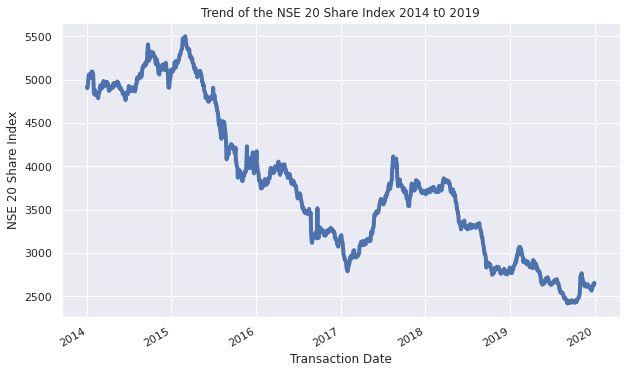

In [ ]:

#Plotting a line graph to view the trend of the Index over the 5 years
data['NSE 20 Share Index'].plot(linewidth=4.0);
plt.ylabel('NSE 20 Share Index')
plt.title('Trend of the NSE 20 Share Index 2014 t0 2019')
#From the graph the index has dropped significantly since 2018

Text(0.5, 1.0, 'Trend of the NSE 20 Share Index 2014 t0 2019-Sample')

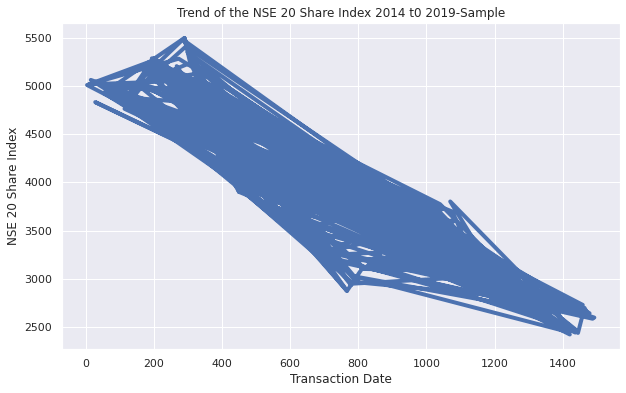

In [ ]:
#Plotting the above line plot for the sample size only
data_sample['NSE 20 Share Index'].plot(linewidth=4.0);
plt.ylabel('NSE 20 Share Index')
plt.xlabel('Transaction Date')
plt.title('Trend of the NSE 20 Share Index 2014 t0 2019-Sample')


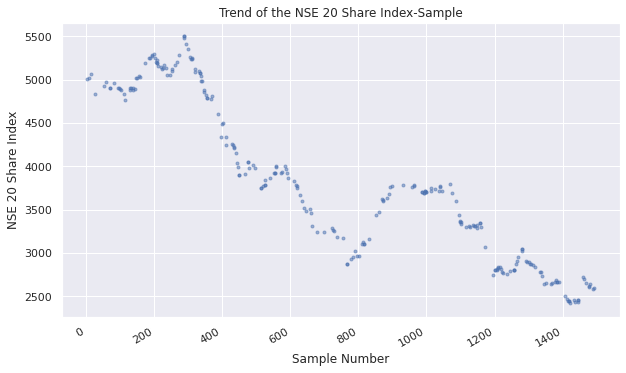

In [ ]:
#Utilizing a dot plot
axes = data_sample['NSE 20 Share Index'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(10, 6), subplots=True)
for ax in axes:
    ax.set_ylabel('NSE 20 Share Index')
    ax.set_xlabel('Sample Number')
    ax.set_title('Trend of the NSE 20 Share Index-Sample')
  #For the sample the dot plot is a better visualizing tool than the line plot
  #This plot indicates the presence of seasonality in the data

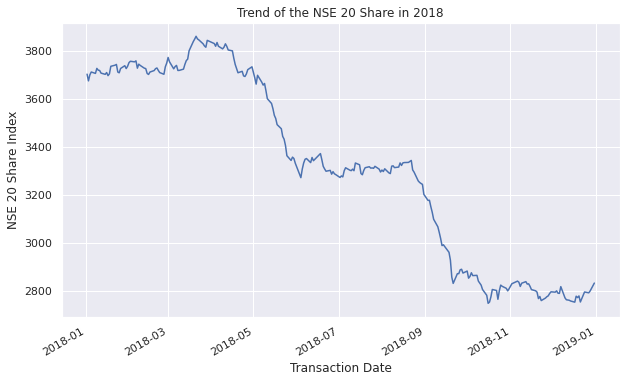

In [ ]:
#Detecting Seasonalities in one year and one month
ax = data.loc['2018', 'NSE 20 Share Index'].plot()
ax.set_ylabel('NSE 20 Share Index')
ax.set_title('Trend of the NSE 20 Share in 2018');
#From the plot the index was at its peak in the month of April 2018 and deteriorated since.

# Customized Plots

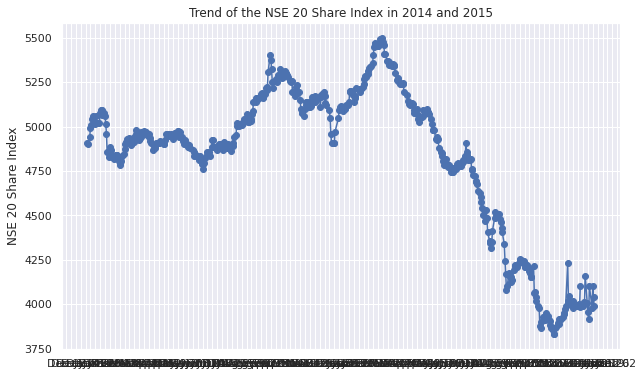

In [ ]:
import matplotlib.dates as mdates
fig, ax = plt.subplots()
ax.plot(data.loc['2014-01':'2015-12', 'NSE 20 Share Index'], marker='o', linestyle='-')
ax.set_ylabel('NSE 20 Share Index')
ax.set_title('Trend of the NSE 20 Share Index in 2014 and 2015')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.TUESDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));


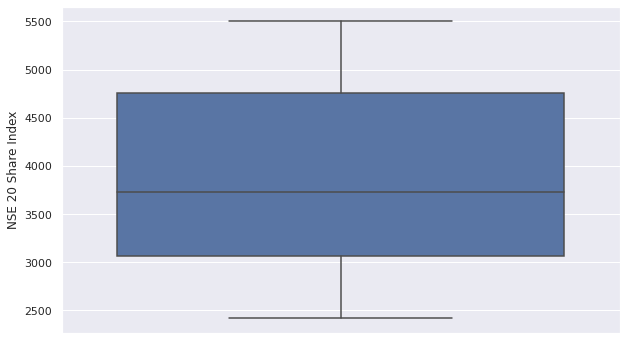

In [ ]:
sns.boxplot(data=data,y='NSE 20 Share Index');

In [ ]:
#Getting the frequencies
#Daily frequency
pd.date_range('2014-01-01', '2017-03-15', freq='D')

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-07', '2014-01-08',
               '2014-01-09', '2014-01-10',
               ...
               '2017-03-06', '2017-03-07', '2017-03-08', '2017-03-09',
               '2017-03-10', '2017-03-11', '2017-03-12', '2017-03-13',
               '2017-03-14', '2017-03-15'],
              dtype='datetime64[ns]', length=1170, freq='D')

In [ ]:
#Rolling Windows
# Computing the centered 7-day rolling mean
data_7d = data['NSE 20 Share Index'].rolling(7, center=True).mean()
data_7d.head(10)
#The mean of the first rolling window is 2014-01-07

Transaction Date
2014-01-02            NaN
2014-01-03            NaN
2014-01-06            NaN
2014-01-07    4980.041429
2014-01-08    4995.250000
2014-01-09    5012.668571
2014-01-10    5029.525714
2014-01-13    5033.518571
2014-01-14    5034.611429
2014-01-15    5031.578571
Name: NSE 20 Share Index, dtype: float64

# Checking the Distribution

Normality Tests

# 1. Histogram

In [ ]:
# Importing matplotlib
from matplotlib import pyplot

# Importing functions from numpy
from numpy.random import seed



/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6630: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6631: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


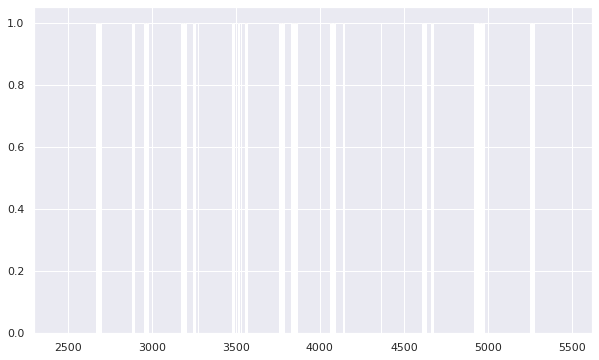

In [ ]:
pyplot.hist(data)
pyplot.show()
#The histogram does not follow a normal distribution

# 2.Quantile-Quantile Plots

In [ ]:
# Importing libraries to plot our Q-Q plot
from statsmodels.graphics.gofplots import qqplot
qqplot(data, line='s')
pyplot.show()


# 3.The Shapiro-Wilk Test

In [ ]:
# imporing the shapiro function
from scipy.stats import shapiro 
# testing for normality
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')
#Since the value of p=1 which is greater than 0.05,then the data exhibits normality

Statistics=nan, p=1.000
Sample looks Gaussian


#4.Anderson-Darling Test

In [ ]:
# Importing anderson function form scipy 
from scipy.stats import anderson
# normality test
result = anderson(data)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(1,1498(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal' % (sl, cv))
    

# 5. D’Agostino’s K^2 test

In [ ]:
from numpy.random import randn
from scipy.stats import normaltest
# normality test
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')
 #The data doesn't not look normal

Statistics=nan, p=nan
Sample does not look Gaussian
